# MLE and Hypothesis Testing

### Read the given csv file [```q4.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4.csv) of samples. Assume that it is drawn from a exponential distribution. What is the difference of log likelihoods for $\lambda = 1$ and $\lambda = 2$ ? Which of the two is more strongly supported?

In [0]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
url = 'https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4.csv'
data = pd.read_csv(url,header=None)
data

,0,1
0,0,0.019404
1,1,0.043634
2,2,0.023797
3,3,0.444340
4,4,0.578160
...,...,...
95,95,0.527331
96,96,0.080760
97,97,0.231057
98,98,0.102720


In [12]:
# Exponetial distribution  , mean is equal to lambda
def exponetial(lamb,x):
  return lamb*(np.exp(-1*lamb*x))

likelihood_1 = 1
likelihood_2 = 1

for val in data[1].values:
  likelihood_1 = likelihood_1 * exponetial(1,val)
  likelihood_2 = likelihood_2 * exponetial(2,val)

log_likelihood_1 = np.log(likelihood_1);
log_likelihood_2 = np.log(likelihood_2);

print("Log likelihood_1 is : {}\n".format(log_likelihood_1))
print("Log likelihood_2 is : {}\n".format(log_likelihood_2))
print("Log likelihood_2 - Log likelihood_1 is {}\n".format(log_likelihood_2-log_likelihood_1))


Log likelihood_1 is : -48.94830108538966

Log likelihood_2 is : -28.581884114784785

Log likelihood_2 - Log likelihood_1 is 20.366416970604874



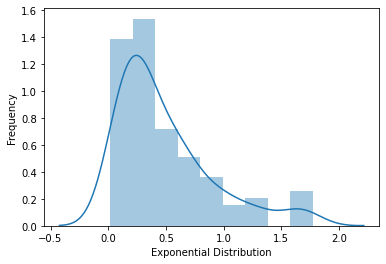

In [14]:
ax = sns.distplot(data[1].values)
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')
plt.show()

In [0]:
As mean is closer to 0.5 which is far lambda = 1 hence lambda =2 is consider to be more likelihood

# PDF of exponential distribution is $\lambda e^{-\lambda x}$
Define a function to find pdf. You can use any module to get pre-defined functions also. And then find the likelihood and log-likelihood

### Read the csv files [```q4_1.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_1.csv) and [```q4_2.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_2.csv) to get samples from two unknown distributions. Choose a significance level and implement the the most general two-sample t-test

In [0]:
sample1 = pd.read_csv('https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_1.csv',header=None)
sample2 = pd.read_csv('https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_2.csv',header=None)

In [17]:
sample1.head()

,0,1
0,0,-0.179278
1,1,0.236714
2,2,0.255502
3,3,-0.029321
4,4,0.004818


In [18]:
sample2.head()

,0,1
0,0,0.680541
1,1,0.436810
2,2,0.604089
3,3,0.518702
4,4,0.479711


Find the parameters required to compute the T statistic

In [31]:
significance = 0.05
mu1 = np.mean(sample1[1].values)
mu2 = np.mean(sample2[1].values)
s1 = np.var(sample1[1].values)
s2 = np.var(sample2[1].values)
n1 = sample1[1].shape[0]
n2 = sample2[1].shape[0]
print(n1)

100


Find the degrees of freedom to get the critical value

In [32]:
df = np.square((s1/n1) + (s2/n2)) / (((s1/n1)**2)/(n1-1) + ((s2/n2)**2)/(n2-1))
df

146.69795658507294

Compare the critical value and the T statistic and conclude whether null hypothesis is accepted or not. Print 'YES' is it is rejected, otherwise print 'NO'.

In [33]:
T = (mu1-mu2) / np.sqrt((s1/n1) + (s2/n2))
critical_value = stats.t.pdf(1-significance/2,df)

if np.abs(T) > critical_value:
  print("Yes")
else:
  print("NO")

Yes


Plot the distribution of both the samples to visualize

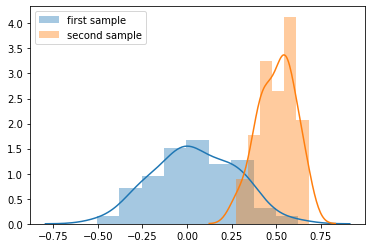

In [0]:
sns.distplot(sample1[1].values)

sns.distplot(sample2[1].values)
plt.legend(['first sample','second sample'])
plt.show()